<h1><center>COMS7047A A2: Neural Networks</center></h1> 

<img src="./wits_logo.png" alt="Wits_Logo" style="width: 400px;"/>

***
<h4><center> Samantha Ball  &nbsp;   1603701   &nbsp;  May 2021</center></h4>


In [1]:
#---- INSTALL VERSION ----#

# needed for feature correlation colourmap
!pip install seaborn==0.10.0.rc0

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [2]:
#-----IMPORTS----#

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score 

## Data Import
The chosen dataset involves the prediction of a specific motion/activity, namely running or walking, based on sensor data. The sensor data is sourced from an iPhone 5c in 10 second intervals and contains variables such as *date, time, username, wrist, acceleration_x, acceleration_y, acceleration_z, gyro_x, gyro_y, gyro_z* and *activity* which is the target variable. The dataset was obtained from [Kaggle](https://www.kaggle.com/vmalyi/run-or-walk). 


In [3]:
#----IMPORT DATA----#

data_path = "./dataset.csv" # data given in CSV format
df = pd.read_csv(data_path) #read in data

pd.set_option('display.max_columns', None) #show all columns
print("The first 5 rows of the dataframe") 
df.head(5)

The first 5 rows of the dataframe


,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


## Data Preparation

In [4]:
#----IMPUTE MISSING VALUES----#

#Find number of missing data entries in each column
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

date
False    88588
Name: date, dtype: int64

time
False    88588
Name: time, dtype: int64

username
False    88588
Name: username, dtype: int64

wrist
False    88588
Name: wrist, dtype: int64

activity
False    88588
Name: activity, dtype: int64

acceleration_x
False    88588
Name: acceleration_x, dtype: int64

acceleration_y
False    88588
Name: acceleration_y, dtype: int64

acceleration_z
False    88588
Name: acceleration_z, dtype: int64

gyro_x
False    88588
Name: gyro_x, dtype: int64

gyro_y
False    88588
Name: gyro_y, dtype: int64

gyro_z
False    88588
Name: gyro_z, dtype: int64



No missing values found therefore no imputation needed.

## Data Exploration

### 1. Distributions of Variables

1    44365
0    44223
Name: activity, dtype: int64


Text(0.5, 0, 'Counts')

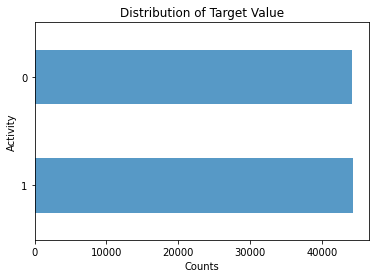

In [5]:
#----TARGET VARIABLE----#

#Visualise target variable: type of activity (0 - walking, 1- running)

target_counts = df["activity"].value_counts()
print(target_counts)

target_counts.plot(kind="barh", alpha=0.75)
plt.title('Distribution of Target Value')
plt.ylabel('Activity')
plt.xlabel('Counts')

A very even split in the two classes is observed. Therefore the classification problem is a balanced problem and has no class imbalance.

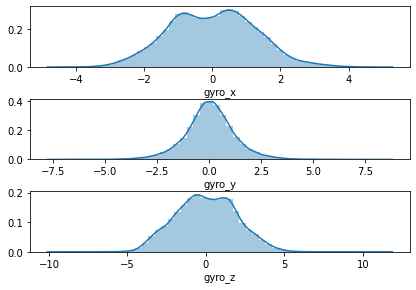

In [6]:
#----PLOT DISTRIBUTIONS OF VARIABLES---#

# gyroscope measurements along each axis

f, axes = plt.subplots(3, 1)
f.tight_layout()
sns.distplot(df["gyro_x"], ax = axes[0])
sns.distplot(df["gyro_y"], ax = axes[1])
sns.distplot(df["gyro_z"], ax = axes[2])
plt.show()


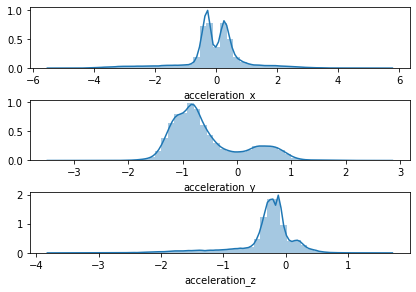

In [7]:
# acceleration measurements along each axis

f, axes = plt.subplots(3, 1)
f.tight_layout()
sns.distplot(df["acceleration_x"], ax = axes[0])
sns.distplot(df["acceleration_y"], ax = axes[1])
sns.distplot(df["acceleration_z"], ax = axes[2])
plt.show()

1    46258
0    42330
Name: wrist, dtype: int64


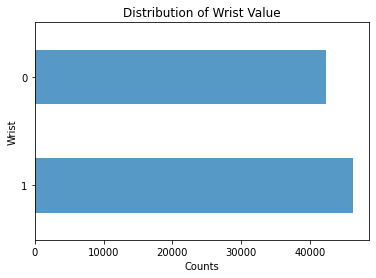

In [8]:
# Wrist variable (0 - left, 1 - right)

wrist_counts = df["wrist"].value_counts()
print(wrist_counts)
wrist_counts.plot(kind="barh", alpha=0.75)
plt.title('Distribution of Wrist Value')
plt.ylabel('Wrist')
plt.xlabel('Counts')
plt.show()

In [9]:
print(df['username'].value_counts())

viktor    88588
Name: username, dtype: int64


We drop the username, date and time columns during training and prediction.

### 2. Relationships between Variables

#### Gyroscope Measurements

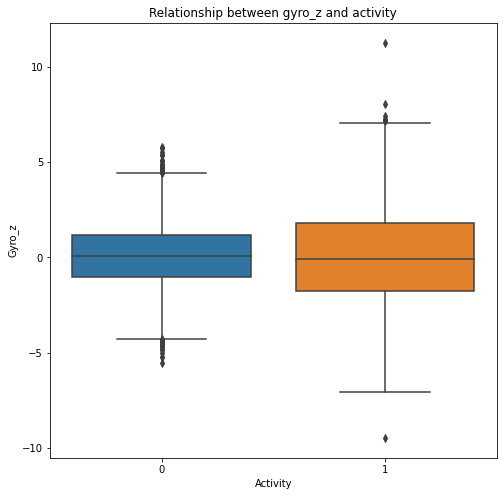

In [10]:
#---- RELATIONSHIP BETWEEN GYROSCOPE AND ACTIVITY ----#

#Relationship between gyro_z and activity

f, ax = plt.subplots(figsize= (8, 8))
sns.boxplot(x="activity", y="gyro_z", data=df)
ax.set_xlabel('Activity')
ax.set_ylabel('Gyro_z')
ax.set_title('Relationship between gyro_z and activity')
plt.show()


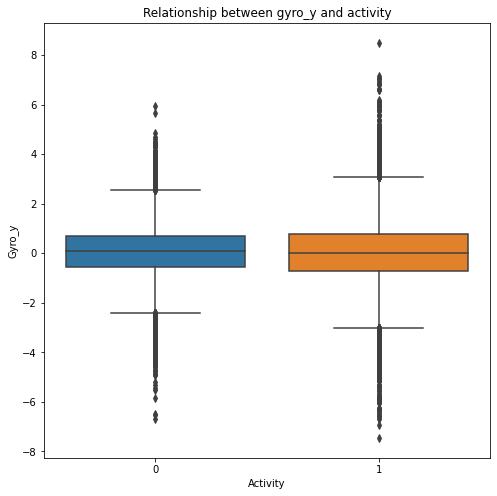

In [11]:
#Relationship between gyro_y and activity

f, ax = plt.subplots(figsize= (8, 8))
sns.boxplot(x="activity", y="gyro_y", data=df)
ax.set_xlabel('Activity')
ax.set_ylabel('Gyro_y')
ax.set_title('Relationship between gyro_y and activity')
plt.show()

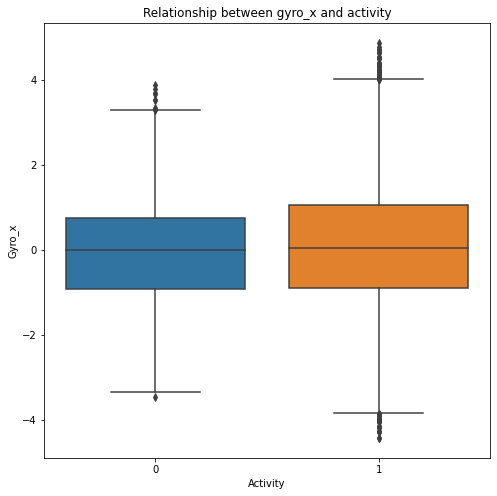

In [12]:
#Relationship between gyro_x and activity

f, ax = plt.subplots(figsize= (8, 8))
sns.boxplot(x="activity", y="gyro_x", data=df)
ax.set_xlabel('Activity')
ax.set_ylabel('Gyro_x')
ax.set_title('Relationship between gyro_x and activity')
plt.show()

#### Acclerometer Measurements

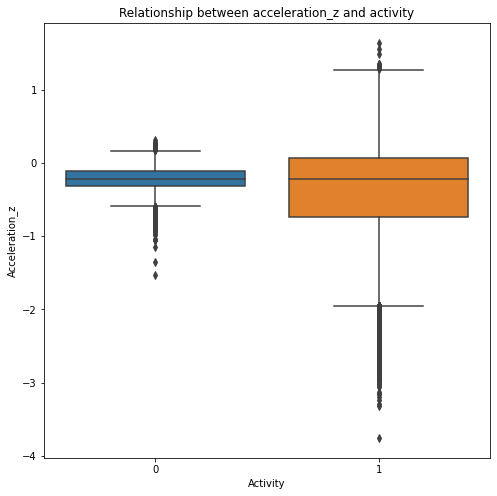

In [13]:
#---- RELATIONSHIP BETWEEN ACCELERATION AND ACTIVITY ----#

#Relationship between acceleration_z and activity

f, ax = plt.subplots(figsize= (8, 8))
sns.boxplot(x="activity", y="acceleration_z", data=df)
ax.set_xlabel('Activity')
ax.set_ylabel('Acceleration_z')
ax.set_title('Relationship between acceleration_z and activity')
plt.show()

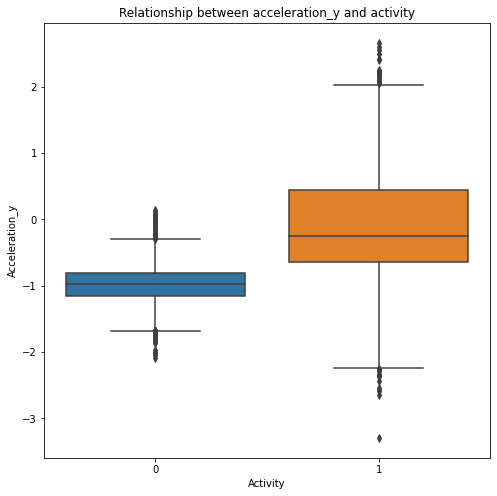

In [14]:
#Relationship between gyro_x and activity

f, ax = plt.subplots(figsize= (8, 8))
sns.boxplot(x="activity", y="acceleration_y", data=df)
ax.set_xlabel('Activity')
ax.set_ylabel('Acceleration_y')
ax.set_title('Relationship between acceleration_y and activity')
plt.show()

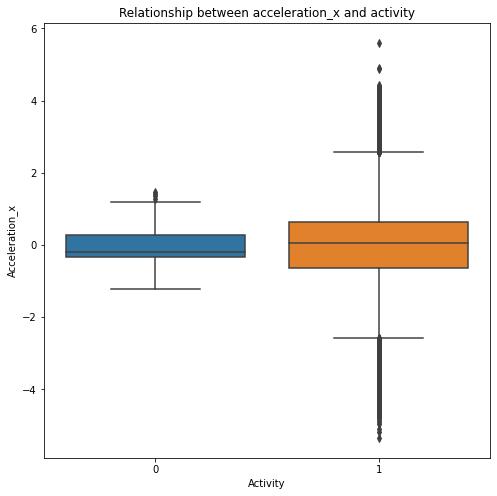

In [15]:
#Relationship between gyro_x and activity

f, ax = plt.subplots(figsize= (8, 8))
sns.boxplot(x="activity", y="acceleration_x", data=df)
ax.set_xlabel('Activity')
ax.set_ylabel('Acceleration_x')
ax.set_title('Relationship between acceleration_x and activity')
plt.show()

#### Left or right wrist

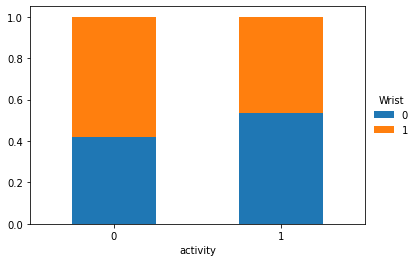

In [16]:
#Relationship between wrist and activity

df_new = df[["wrist", "activity"]].pivot_table(columns="activity", index="wrist", aggfunc=len, fill_value=0).T.apply(lambda x: x/sum(x), axis=1)
ax = df_new.plot(kind='bar', stacked=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title="Wrist", framealpha=0);
plt.show()

### Data Transformation

It is important to transform our output variable into a *1-of-k* format.

Therefore we use one hot encoding to encode the *activity* column.
Our network will have two output neurons, which will output [1,0] for *walking* and [0, 1] for *running* respectively. Our output variables will be *activity_0* and *activity_1*.

In [17]:
#---- TRANSFORM TARGET VARIABLE ----#

# One hot encoding

dummy_variable_1=pd.get_dummies(df["activity"], prefix='activity')
df = pd.concat([df, dummy_variable_1], axis=1)
df

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,activity_0,activity_1
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,1,0
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,1,0
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,1,0
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,1,0
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048,1,0
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761,1,0
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616,1,0
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755,1,0


### Correlation

We finish our data exploration by getting an idea of the correlation between the predictors and the output variable *activity*.

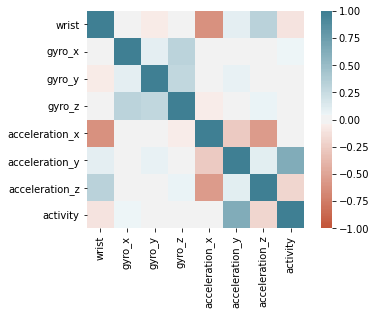

In [18]:
# Plot correlation of predictor variables with target variable charges
features = df[["wrist", "gyro_x", "gyro_y", "gyro_z", "acceleration_x", "acceleration_y", "acceleration_z", "activity"]]
feat_corr = features.corr()
ax = sns.heatmap(
    feat_corr , 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

## 1. Neural Network Implementation

The first step in the investigation will be to implement a neural network from scratch, and train the network on the data using backpropagation and gradient descent.

### Network Architecture

We start by defining our network architecture. 

- Since we have 7 input features (*wrist, gyro_x, gyro_y, gyro_z, acceleration_x, acceleration_y, acceleration_z*), we require 7 neurons in the input layer.
- In addition, since we have two output classes (*walking, running*), we require 2 neurons in the output layer.
- For the base architecture, we will use one hidden layer with four hidden neurons.

The base architecture is depicted in the figure below.

<img src="./network_architecture.png" alt="Wits_Logo" style="width: 400px;"/>

#### Sigmoid Activation Function

We then define the sigmoid activation function as follows:

$$
\begin{align}
\sigma(z) = \frac{1}{1+e^{-z}}
\end{align}
$$

Therefore the activation of the neuron can be written as:

$$
\begin{align}
\sigma(\mathbf{\theta^T x}) = \frac{1}{1+e^{-\mathbf{\theta^T x}}}
\end{align}
$$

We also define the derivative of the sigmoid for use in backpropagation.

$$
\begin{align}
\sigma(z)' = \sigma(z)(1-\sigma(z))
\end{align}
$$

In [19]:
def sigmoid(z):
    
    a = 1/(1+np.exp(-z))
    
    return a


def sigmoid_derivative(activation):
    
        return np.multiply(activation, 1 - activation)

#### Forward propagation

Forward propagation refers to the process of computing all the activations from the input layer to the output layer in order to obtain a prediciton $h_\theta(\mathbf{\mathcal{x}})$ for the given input $\mathcal{x}$.

For the given network architecture, the forward propagation steps can be written as follows:

$$
\begin{align}
z^{(2)} = \theta^{(1)} x \\
a^{(2)} = g(z^{(2)})\\
z^{(3)} = \theta^{(2)} x \\
h_\theta(\mathbf{\mathcal{x}}) = a^{(3)} = g(z^{(3)})
\end{align}
$$

where $g$ represents the chosen activation function. For the base implementation, we have chosen this activation function as the sigmoid function $\sigma$. 

In [20]:
def forward_propagation(x, thetas, bias):
    
    z2 = np.dot(thetas[0], x) + bias[0] # add bias
    a2 = sigmoid(z2)
     
    z3 = np.dot(thetas[1], a2) + bias[1] # add bias
    a3 = sigmoid(z3)
    
    activations = [a2, a3]

    return activations
    

#### Cost function

We then define the cost function for a multi-class neural network as follows:

$$
\begin{align}
J(\theta) &= -\frac{1}{n} \sum_{i=1}^n \sum_{k=1}^K y_{ik}log(h_{\theta}(x^{(i)})_k +  (1 - y_{ik}) log(1 - (h_{\theta}(x^{(i))}_k)
\end{align}
$$

where $n$ is the number of training examples and $K$ is the number of output classes. This cost function is derived from the logistic regression cost function. We implement the cost function in the method *cost_function* below.

If regularization is added to the cost function, the regularized cost function can be defined as followed:

$$
\begin{align}
J(\theta) &= -\frac{1}{n} \sum_{i=1}^n \sum_{k=1}^K y_{ik}log(h_{\theta}(x^{(i)})_k +  (1 - y_{ik}) log(1 - (h_{\theta}(x^{(i))}_k) + \frac{\lambda}{2n} \sum_{l=1}^{L-1}\sum_{i=1}^{s_l-1} \sum_{j=1}^{s_l} (\theta_{ij}^{(l)})^2
\end{align}
$$

where $L$ is the number of layers in the network and $s_l$ is the number of nodes in the layer. The additional term is the sum of all the weights in the weight matrix, for all $L-1$ weight matrices in the network.

In [21]:
def cost_function(y_true, y_pred, thetas):
    
    regularization = 0
    n = y_true.shape[1] 
    
    y_pred[y_pred >=1] = 0.99999999 # to prevent division by zero error
    y_pred[y_pred ==0] = 10**-10 # to prevent division by zero error
        
    
    terms = np.multiply(y_true, np.log(y_pred)) + np.multiply((1-y_true), np.log(1-y_pred)) # make use of vectorization
    j = (-1/n)*np.sum(terms) 
    if (regularization==1):
        j = j + (lambda_reg/2*n)*np.sum([np.dot(theta, theta) for theta in thetas])# account for all layers
    
    j = np.squeeze(j) # one dimension
    return j

#### Back propagation

In order to calculate the gradient of the cost function with respect to the parameters $\theta$, we must perform backpropagation.

We first calculate the error terms $\delta_j^{(l)}$ which represents the error introduced by node $j$ in layer $l$.

$$
\begin{align}
\delta_j^{(l)} = \frac{\partial J(\theta)}{\partial z_{j}^{(l)}} 
\end{align}
$$

Therefore we compute the partial derivative of the cost with respect to the summation $\partial z_{j}^{(l)}$.

We can compute each error as follows,

$$
\begin{align}
\delta^{(4)} &= \frac{\partial J(\theta)}{\partial z^{(4)}} = a^{(4)} - y \\
\delta^{(3)} &= \frac{\partial J(\theta)}{\partial z^{(3)}} 
= \frac{\partial J(\theta)}{\partial z^{(4)}} \frac{\partial z^{(4)}}{\partial z^{(3)}}\\
&=  \delta^{(4)}  \frac{\partial (\theta^{(3)}a^{(3)}+b^{(3)})}{\partial z^{(3)}} \\
&=  \delta^{(4)} \theta^{(3)} g'(z^{(3)}) \\
\delta^{(2)} &= \frac{\partial J(\theta)}{\partial z^{(2)}} 
= \frac{\partial J(\theta)}{\partial z^{(4)}} \frac{\partial z^{(4)}}{\partial z^{(3)}} \frac{\partial z^{(3)}}{\partial z^{(2)}}\\
&=  \delta^{(3)}  \frac{\partial (\theta^{(2)}a^{(2)}+b^{(2)})}{\partial z^{(2)}} \\
&=  \delta^{(3)} \theta^{(2)} g'(z^{(2)})
\end{align}
$$

We can then find the gradient using the following expression,

$$
\begin{align}
\frac{\partial J(\theta)}{\partial \theta_{ij}^{(l)}} = a_j^{(l)}\delta_i^{(l+1)} 
\end{align}
$$

In order to increase the efficiency of the computation, we use the vectorized form, 

$$
\begin{align}
\delta^{(l+1)} (a^{(l)})^{T}
\end{align}
$$

In [22]:
def back_prop(x, y, thetas, bias, activations):
    
    m = y.shape[1]
  
    # calculate error
    dZ2 = activations[1] - y
    # calculate gradients
    dW2 = (1 / m) * np.dot(dZ2, activations[0].T)
    db2 = (1 / m) * np.sum(dZ2, axis = 1, keepdims = True)

    # calculate error
    dZ1 = np.multiply(np.dot( thetas[1].T, dZ2), sigmoid_derivative(activations[0]))
    # calculate gradients
    dW1 = (1 / m) * np.dot(dZ1, x.T)
    db1 = (1 / m) * np.sum(dZ1, axis = 1, keepdims = True)
    
    grads = [dW1, dW2]
    bias_grads = [db1, db2]
    
      
    return grads, bias_grads

### Visualisation of Training Process

In order to provide insight and understanding into the training process, several graphs were plotted.


*1. Training Loss* 

The training curve was plotted for each iteration of the gradient descent algorithm to ensure that training was occurring correctly and that the training cost was decreasing as expected.

*2. Training and Validation Loss* 

In addition, the training and validation curves were plotted on the same axes for each iteration of the gradient descent algorithm in order to provide a visualisation of how well the network generalises. This allows for direct comparison between the training error and validation error, and therefore indicates overfitting if the training error is much lower than the validation error.

*3. Test Accuracy*

The accuracy on the test set was plotted as a measure of model performance over the duration of gradient descent. Accuracy represents the rate at which the model correctly classifies an input test sample and is calculated by

$$
\begin{align}
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
\end{align}
$$



*4. Confusion Matrix*

In order to further understand the classification performance of the model, the confusion matrix was plotted to indicate the number of true positives (TP), true negatives (TN), false positives (FP) and false negatives (FN) obtained on the test set and therefore provide more insight into misclassifications.



In [23]:
#---- DATA VISUALISATION ----#


# evaluate model on test data for use in test loss visualisation
def evaluate(x_test, y_test, thetas, bias):
    a2, a3 = forward_propagation(x_test, thetas, bias) # predict using test data
    y_pred = a3
    loss = cost_function(y_pred, y_test)
    return loss


# plot training loss as a function of iterations
def plot_train_loss(losses):
    plt.plot(losses, label = "Training Loss", color = 'm')
    plt.ylabel('Loss')
    plt.xlabel('Iterations')
    plt.title("Training Error")
    plt.show()
    

#pPlot training and validation loss as a function of iterations
def plot_train_validation_loss(losses, validation_losses):
    plt.plot(losses, label = "Training Loss", color = 'm')
    plt.plot(validation_losses, label = "Validation Loss", color = 'c')
    plt.ylabel('Loss')
    plt.xlabel('Iterations')
    plt.legend()
    plt.title("Training and Validation Error")
    plt.show()
    
    
    
# plot test accuracy as a function of iterations
def plot_test_accuracy(accuracies):
    plt.plot(accuracies, label = "Test Accuracy", color = 'mediumseagreen')
    plt.ylabel('Accuracy')
    plt.xlabel('Iterations')
    plt.title("Test Accuracy")
    plt.show()
    

# calculate true positive, false positive, true negative and false negative rates
def calculate_rates(targets, predictions):

    TP = 0
    FP = 0
    TN = 0
    FN = 0


    for i in range(len(predictions)): 
        if (targets[i]==1 and predictions[i]>=0.5):
            TP += 1
        if (predictions[i]>=0.5 and targets[i]==0):
            FP += 1
        if (targets[i]==0 and predictions[i]< 0.5):
            TN += 1
        if (predictions[i]<0.5 and targets[i]==1):
            FN += 1

    return(TP, FP, TN, FN)


# calculate model accuracy
def get_accuracy(y_true, y_pred):
    
    TP, FP, TN, FN = calculate_rates(y_true[0], y_pred[0])
    
    accuracy = (TP + TN)/(TP+ TN + FP + FN)
    
    return accuracy
    
    
    
# plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    
    
    TP, FP, TN, FN = calculate_rates(y_true[0], y_pred[0])
    array = np.array([[TP, FN],
         [FP, TN]])

    df_cm = pd.DataFrame(array, index=["True", "False"],  columns=["True", "False"])
    sns.set(font_scale=1.1) # for label size
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    sns.heatmap(df_cm, annot=True, cmap ='Blues', annot_kws={"size": 16}, fmt="d") # font size #light=1
    plt.title("Confusion Matrix")
    plt.show()

### Gradient descent

Batch gradient descent was then implemented to update the weights and biases in the network, using the gradients calculated via backpropagation.

The data was split into training, validation and test sets. All datasets are input into the batch gradient descent function for visualisation purposes over the duration of training.

In [24]:
#---BATCH GRADIENT DESCENT---#

def batch_grad_desc(x_train, y_train, x_valid, y_valid, x_test, y_test, thetas, bias, iterations, learning_rate):

    #learning_rate = 0.5

    losses = []
    validation_losses= []
    test_accuracies = []
    for i in range(0, num_iterations):

            # forward propagation
            activations = forward_propagation(x_train, thetas, bias)

            # cost function
            cost =  cost_function(y_train, activations[1], thetas[0])
            losses.append(cost)
        
            
            # compute validation loss
            valid_activations = forward_propagation(x_valid, thetas, bias)
            valid_cost = cost_function(y_valid, valid_activations[1], thetas[0])
            validation_losses.append(valid_cost)
            
            # compute test accuracy 
            test_activations = forward_propagation(x_test, thetas, bias)
            #test_cost = cost_function(y_test, test_activations[1], thetas[0])
            #test_losses.append(test_cost)
            test_accuracies.append(r2_score(y_test , test_activations[1]))

            # backpropagation
            grads, bias_grads = back_prop(x_train, y_train, thetas, bias, activations)
            
            # updating parameters according to grad desc
            thetas[0] = thetas[0] - learning_rate * grads[0]
            bias[0] = bias[0] - learning_rate * bias_grads[0]
            thetas[1] = thetas[1] - learning_rate * grads[1]
            bias[1] = bias[1] - learning_rate * bias_grads[1]

            # print the cost every 500 iterations
            if (i % 500 == 0):
                print ("Cost after iteration % i: % f" % (i, cost))
            
    
  
    plot_train_loss(losses)
    plot_train_validation_loss(losses, validation_losses)
    plot_test_accuracy(test_accuracies)
    return thetas, bias


### Training

We initialise the network with random weights and not uniform weights to ensure that the network learns correctly.
We use the validation set to tune parameters such as the learning rate.

Cost after iteration  0:  1.386378
Cost after iteration  500:  0.482333


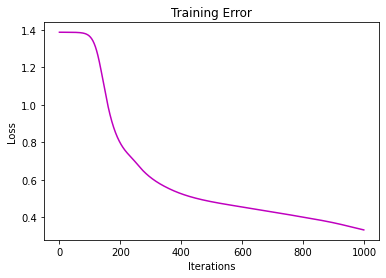

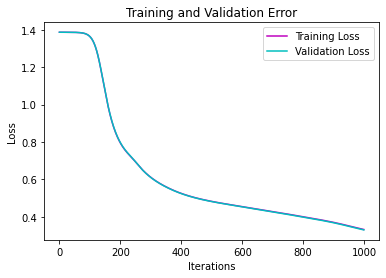

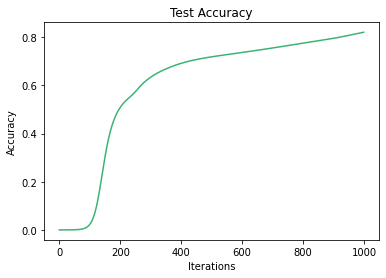

In [25]:
#---- TRAINING ----#


# split into training, validation and test data
x = df[["wrist", "gyro_x", "gyro_y", "gyro_z", "acceleration_x", "acceleration_y", "acceleration_z"]].values
y = df[["activity_0", "activity_1"]].values

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size = 1/3, random_state = 0)
x_valid, x_test, y_valid, y_test = train_test_split(x, y, test_size = 1/2, random_state = 0)


# reshape to correct dimensions
x_train = np.transpose(x_train)
y_train = np.transpose(y_train)
x_valid = np.transpose(x_test)
y_valid = np.transpose(y_test)
x_test = np.transpose(x_test)
y_test = np.transpose(y_test)


# set parameters
num_iterations = 1000
hidden_nodes = 4
learning_rate = 0.5

# init weight matrices and bias
W1 = np.random.randn(hidden_nodes, x_train.shape[0]) * 0.01
b1 = np.zeros(shape =(hidden_nodes, 1))

W2 = np.random.randn(y_train.shape[0], hidden_nodes) * 0.01
b2 = np.zeros(shape =(y_train.shape[0], 1))

thetas = [W1, W2]
bias = [b1, b2]

new_thetas, new_bias = batch_grad_desc(x_train, y_train, x_valid, y_valid, x_test, y_test, thetas, bias, num_iterations, learning_rate) 


### Model Performance

In order to measure our model performance and generalisation ability, we predict using our test dataset and calculate model accuracy and the corresponding confusion matrix.

Model Performance

R2 Score : 0.8213228357576531
Model Accuracy: 82.13228357576531%



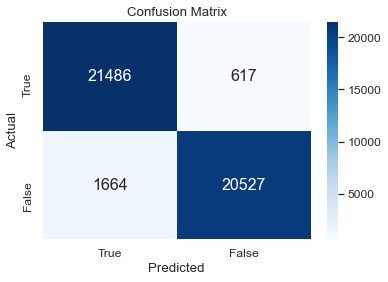

In [26]:
#---- MODEL PERFORMANCE ----#

a2, y_pred = forward_propagation(x_test, new_thetas, new_bias)
score = r2_score(y_test , y_pred)
print("Model Performance\n")
print("R2 Score : {}".format(score))
print("Model Accuracy: {}%\n".format(score * 100))

plot_confusion_matrix(y_test, y_pred)

## 2. Effect of Different Activation Functions

We now investigate the effects of different activation functions. In particular we investigate linear, relu and tanh activation functions, as well as the sigmoid used in our baseline model.

<img src="./sigmoid_linear.png" alt="Wits_Logo" style="width: 400px;"/>

The linear activation function can be modelled by a straight line through the origin with $f(x) = x$. Therefore the summation $z$ passes unchanged through the linear activation function. No non-linearity is introduced by the linear activation function, therefore resembling linear regression and being unable to learn complex mappings. 

The linear activation function is defined below. The derivative of the linear activation function is $f'(x) = 1$.

In [27]:
def linear(z):
    
    a=z
    
    return a

<img src="./tanh_relu.png" alt="Wits_Logo" style="width: 400px;"/>

The tanh activation function is bounded between -1 and 1 as shown in the diagram above. The derivative of the tanh function is $f'(x) = 1-2tanh(x)^2$.

In [28]:
def tanh(z):
    
    a = np.tanh(z)
    
    return a

The relu activation function stands for Recified Linear Unit and can be represented as $max(0, z)$. The derivative of the relu function is $f'(z) = 1$ if $z > 0$ and $f'(z) = 0$ if $z < 0$.

In [29]:
def relu(z):

    return np.maximum(0,z)
  

We create a function to compute the required derivative depending on the activation function.

In [30]:
#---- ACTIVATION FUNCTION DERIVATIVES ----#

def derivative_custom(function, activation):
    
    if (function == "sigmoid"):
        
        return np.multiply(activation, 1 - activation)

    elif (function == "tanh"):
    
        return 1 - np.power(activation,2)
    
    elif (function == "linear"):
    
        return 1 # check this
    
    elif (function == "relu"):
    
        return activation > 0

    else:
    
        return np.multiply(activation, 1 - activation) # sigmoid is default

### Activation Function Benefits and Drawbacks

Although all of the functions discussed above can be used as activation functions, not all of them are suitable for activation functions in the output layer for the problem of classification.
- The tanh function outputs values between -1 and 1, which do not map to the output labels which are given in terms of 0 and 1. 
- Moreover, the linear and relu functions do not produce a bounded output and therefore do not provide a suitable output for classification.

Therefore only the sigmoid activation function is used in the output layer as it outputs values between 0 and 1. This allows a threshold of 0.5 to decide whether the input is classified as the *walking* or *running* class. 

The effects of the alternative activation functions are still explored by choosing different activation functions in the layers prior to the output layer, as defined in the forward propagation function below.

In [31]:
def forward_prop_custom(x, thetas, bias, function):
    
    if (function == "sigmoid"):
    
        z2 = np.dot(thetas[0], x) + bias[0] 
        a2 = sigmoid(z2)
    
        z3 = np.dot(thetas[1], a2) + bias[1]
        a3 = sigmoid(z3)
        
        activations = [a2, a3]
        
        
    elif (function == "tanh"):
        
        z2 = np.dot(thetas[0], x) + bias[0] 
        a2 = tanh(z2)
    
        # add bias
        z3 = np.dot(thetas[1], a2) + bias[1]
        a3 = sigmoid(z3)
        
        activations = [a2, a3]
    
    elif (function == "linear"):
        
        z2 = np.dot(thetas[0], x) + bias[0] 
        a2 = linear(z2)
    
        z3 = np.dot(thetas[1], a2) + bias[1]
        a3 = sigmoid(z3)
        
        activations = [a2, a3]
        
    
    elif (function == "relu"):
        
        z2 = np.dot(thetas[0], x) + bias[0] 
        a2 = relu(z2)
    
        z3 = np.dot(thetas[1], a2) + bias[1]
        a3 = sigmoid(z3)
        
        activations = [a2, a3]
        
    else:
        
        z2 = np.dot(thetas[0], x) + bias[0] 
        a2 = sigmoid(z2)
    
        # add bias
        z3 = np.dot(thetas[1], a2) + bias[1]
        a3 = sigmoid(z3)
    
        activations = [a2, a3]
    
    return activations
    

We alter our backpropagation function to use the correct derivative for the given activation function.

In [32]:
def back_prop_custom(X, Y, thetas, bias, activations, function):
    
    m = Y.shape[1] 
    
  
    # backward propagation
    dZ2 = activations[1] - Y
    dW2 = (1 / m) * np.dot(dZ2, activations[0].T)
    db2 = (1 / m) * np.sum(dZ2, axis = 1, keepdims = True)
  
    dZ1 = np.multiply(np.dot( thetas[1].T, dZ2), derivative_custom(function, activations[0])) # specified activation function
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis = 1, keepdims = True)
    
    grads = [dW1, dW2]
    bias_grads = [db1, db2]
    
  
    return grads, bias_grads

In [33]:
#---BATCH GRADIENT DESCENT---#

def batch_grad_desc_custom(x_train, y_train, x_valid, y_valid, x_test, y_test, thetas, bias, iterations, learning_rate, function):


    losses = []
    validation_losses = []
    test_accuracies = []
    for i in range(0, num_iterations):

            # forward propagation
            activations = forward_prop_custom(x_train, thetas, bias, function)
            #A2, A3 = forward_propagation(x_train, thetas, bias)

            # backpropagation
            grads, bias_grads = back_prop_custom(x_train, y_train, thetas, bias, activations, function)
            
            # Updating the parameters according to algorithm
            thetas[0] = thetas[0] - learning_rate * grads[0]
            bias[0] = bias[0] - learning_rate * bias[0]
            thetas[1] = thetas[1] - learning_rate * grads[1]
            bias[1] = bias[1] - learning_rate * bias[1]
            
            # cost function
            cost =  cost_function(y_train, activations[1], thetas[0])
            losses.append(cost)
            
            # compute validation loss
            valid_activations = forward_prop_custom(x_valid, thetas, bias, function)
            valid_cost = cost_function(y_valid, valid_activations[1], thetas[0])
            validation_losses.append(valid_cost)
            
            # compute test loss
            test_activations = forward_prop_custom(x_test, thetas, bias, function)
            #test_cost = cost_function(y_test, test_activations[1], thetas[0])
            #test_losses.append(test_cost)
            test_accuracies.append(r2_score(y_test, test_activations[1]))

            # Print the cost every 1000 iterations
            if (i % 500 == 0):
                print ("Cost after iteration % i: % f" % (i, cost))
    
  
    plot_train_loss(losses)
    plot_train_validation_loss(losses, validation_losses)
    plot_test_accuracy(test_accuracies)
    return thetas, bias

### Sigmoid

We verify the functioning of the custom activation function pipeline by testing with the baseline sigmoid activation function.


Training

Cost after iteration  0:  1.386331
Cost after iteration  500:  0.537021


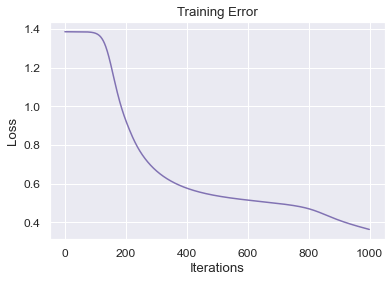

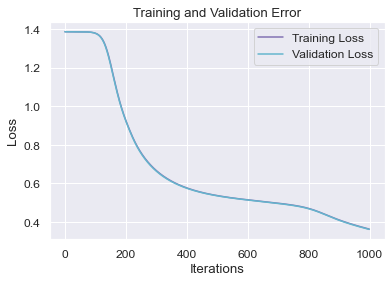

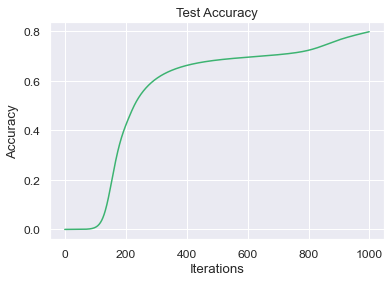


Model Performance

R2 Score : 0.7989854735140632
Model Accuracy: 79.89854735140632%



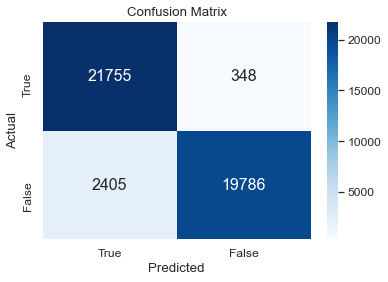

In [34]:
#--- SIGMOID ---#

# split into training, validation and test data
x = df[["wrist", "gyro_x", "gyro_y", "gyro_z", "acceleration_x", "acceleration_y", "acceleration_z"]].values
y = df[["activity_0", "activity_1"]].values

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size = 1/3, random_state = 0)
x_valid, x_test, y_valid, y_test = train_test_split(x, y, test_size = 1/2, random_state = 0)


# reshape to correct dimensions
x_train = np.transpose(x_train)
y_train = np.transpose(y_train)
x_valid = np.transpose(x_test)
y_valid = np.transpose(y_test)
x_test = np.transpose(x_test)
y_test = np.transpose(y_test)


# set parameters
num_iterations = 1000
hidden_nodes = 4
learning_rate = 0.5
function = "sigmoid"

# init weight matrices and bias
W1 = np.random.randn(hidden_nodes, x_train.shape[0]) * 0.01
b1 = np.zeros(shape =(hidden_nodes, 1))

W2 = np.random.randn(y_train.shape[0], hidden_nodes) * 0.01
b2 = np.zeros(shape =(y_train.shape[0], 1))

thetas = [W1, W2]
bias = [b1, b2]

print("\nTraining\n")

new_thetas, new_bias = batch_grad_desc_custom(x_train, y_train, x_valid, y_valid, x_test, y_test, thetas, bias, num_iterations, learning_rate, function) 


print("\nModel Performance\n")
a2, y_pred = forward_prop_custom(x_test, new_thetas, new_bias, function)
score = r2_score(y_test , y_pred)
#score = get_accuracy(y_test, y_pred)
print("R2 Score : {}".format(score))
print("Model Accuracy: {}%\n".format(score * 100))

plot_confusion_matrix(y_test, y_pred)

We achieve very similar results to before, therefore confirming the functioning of the pipeline.

### Linear

We then investigate the effects of the linear activation function.


Training

Cost after iteration  0:  1.386163
Cost after iteration  500:  0.885568


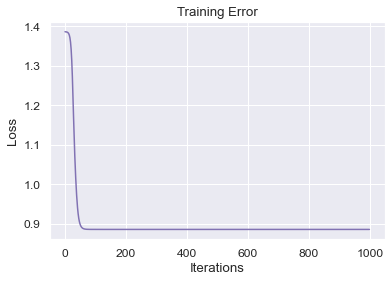

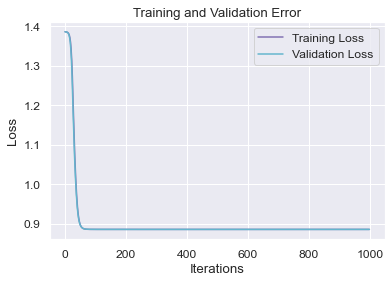

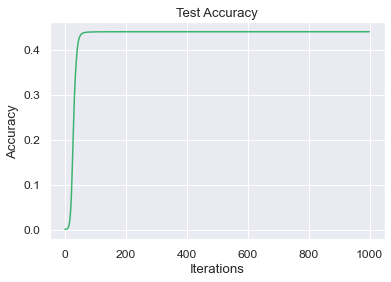


Model Performance

R2 Score : 0.43979650661289094
Model Accuracy: 43.97965066128909%



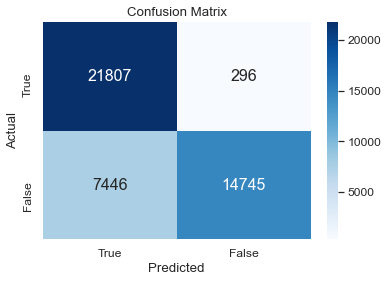

In [36]:
#--- LINEAR ---#

# split into training, validation and test data
x = df[["wrist", "gyro_x", "gyro_y", "gyro_z", "acceleration_x", "acceleration_y", "acceleration_z"]].values
y = df[["activity_0", "activity_1"]].values

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size = 1/3, random_state = 0)
x_valid, x_test, y_valid, y_test = train_test_split(x, y, test_size = 1/2, random_state = 0)


# reshape to correct dimensions
x_train = np.transpose(x_train)
y_train = np.transpose(y_train)
x_valid = np.transpose(x_test)
y_valid = np.transpose(y_test)
x_test = np.transpose(x_test)
y_test = np.transpose(y_test)


# set parameters
num_iterations = 1000
hidden_nodes = 4
learning_rate = 0.5
function = "linear"

# init weight matrices and bias
W1 = np.random.randn(hidden_nodes, x_train.shape[0]) * 0.01
b1 = np.zeros(shape =(hidden_nodes, 1))

W2 = np.random.randn(y_train.shape[0], hidden_nodes) * 0.01
b2 = np.zeros(shape =(y_train.shape[0], 1))

thetas = [W1, W2]
bias = [b1, b2]

print("\nTraining\n")

new_thetas, new_bias = batch_grad_desc_custom(x_train, y_train, x_valid, y_valid, x_test, y_test, thetas, bias, num_iterations, learning_rate, function) 


print("\nModel Performance\n")
a2, y_pred = forward_prop_custom(x_test, new_thetas, new_bias, function)
score = r2_score(y_test , y_pred)
#score = get_accuracy(y_test, y_pred)
print("R2 Score : {}".format(score))
print("Model Accuracy: {}%\n".format(score * 100))

plot_confusion_matrix(y_test, y_pred)

As we expect, the linear activation function does not perform as well due to the limited complexity that the network can model as there is no non-linearity introduced by the linear activation function. 

Accordingly, we observe that the test accuracy is much lower at **44%** and that there are a high number of False Positives (FP) as shown in the confusion matrix visualisation. Notably, the training and validation loss does not decrease after a certain number of iterations, indicating that the model is not complex enough and thus more training does not improve model performance.

### ReLU


Training

Cost after iteration  0:  1.386234
Cost after iteration  500:  0.210848


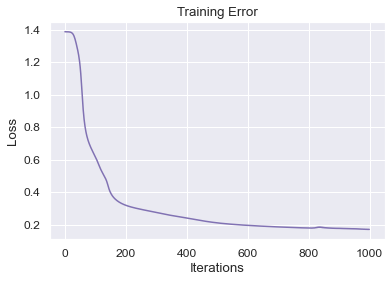

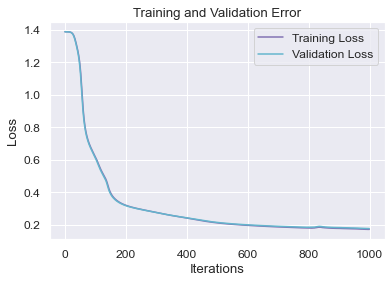

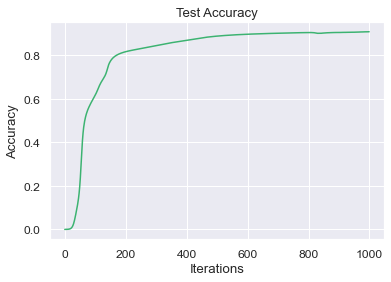


Model Performance

R2 Score : 0.9084738037084685
Model Accuracy: 90.84738037084685%



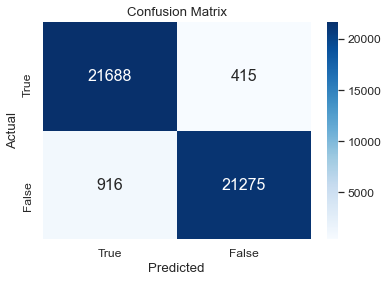

In [37]:
#--- RELU ---#

# split into training, validation and test data
x = df[["wrist", "gyro_x", "gyro_y", "gyro_z", "acceleration_x", "acceleration_y", "acceleration_z"]].values
y = df[["activity_0", "activity_1"]].values

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size = 1/3, random_state = 0)
x_valid, x_test, y_valid, y_test = train_test_split(x, y, test_size = 1/2, random_state = 0)

# reshape to correct dimensions
x_train = np.transpose(x_train)
y_train = np.transpose(y_train)
x_valid = np.transpose(x_test)
y_valid = np.transpose(y_test)
x_test = np.transpose(x_test)
y_test = np.transpose(y_test)


# set parameters
num_iterations = 1000
hidden_nodes = 4
learning_rate = 0.5
function = "relu"

# init weight matrices and bias
W1 = np.random.randn(hidden_nodes, x_train.shape[0]) * 0.01
b1 = np.zeros(shape =(hidden_nodes, 1))

W2 = np.random.randn(y_train.shape[0], hidden_nodes) * 0.01
b2 = np.zeros(shape =(y_train.shape[0], 1))

thetas = [W1, W2]
bias = [b1, b2]

print("\nTraining\n")

new_thetas, new_bias = batch_grad_desc_custom(x_train, y_train, x_valid, y_valid, x_test, y_test, thetas, bias, num_iterations, learning_rate, function) 


print("\nModel Performance\n")
a2, y_pred = forward_prop_custom(x_test, new_thetas, new_bias, function)
score = r2_score(y_test , y_pred)
#score = get_accuracy(y_test, y_pred)
print("R2 Score : {}".format(score))
print("Model Accuracy: {}%\n".format(score * 100))

plot_confusion_matrix(y_test, y_pred)

We observe that the ReLU activation function performs much better than the linear activation function as expected since non-linearity is introduced. In addition, we observe that the ReLU activation function performs better than the sigmoid activation function, attaining an accuracy of **91%**. 

The effects and benefits of the ReLU activation function are explored even further in the next section with an increased number of hidden layers. 

### Tanh


Training

Cost after iteration  0:  1.386320
Cost after iteration  500:  0.474841


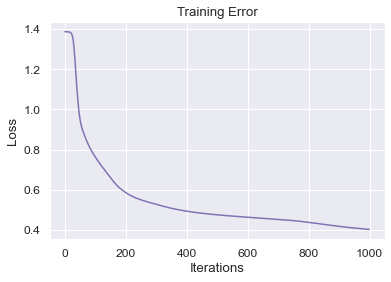

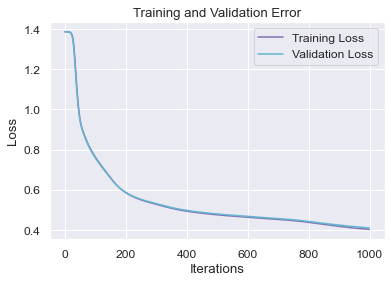

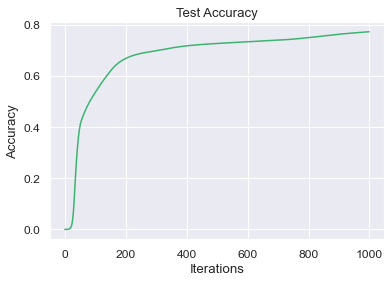


Model Performance

R2 Score : 0.7718009359118861
Model Accuracy: 77.18009359118861%



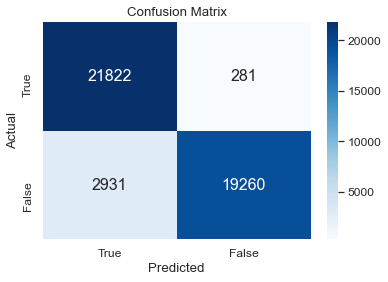

In [39]:
#--- TANH ---#

# split into training, validation and test data
x = df[["wrist", "gyro_x", "gyro_y", "gyro_z", "acceleration_x", "acceleration_y", "acceleration_z"]].values
y = df[["activity_0", "activity_1"]].values

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size = 1/3, random_state = 0)
x_valid, x_test, y_valid, y_test = train_test_split(x, y, test_size = 1/2, random_state = 0)

# reshape to correct dimensions
x_train = np.transpose(x_train)
y_train = np.transpose(y_train)
x_valid = np.transpose(x_test)
y_valid = np.transpose(y_test)
x_test = np.transpose(x_test)
y_test = np.transpose(y_test)


# set parameters
num_iterations = 1000
hidden_nodes = 4
learning_rate = 0.5
function = "tanh"

# init weight matrices and bias
W1 = np.random.randn(hidden_nodes, x_train.shape[0]) * 0.01
b1 = np.zeros(shape =(hidden_nodes, 1))

W2 = np.random.randn(y_train.shape[0], hidden_nodes) * 0.01
b2 = np.zeros(shape =(y_train.shape[0], 1))

thetas = [W1, W2]
bias = [b1, b2]

print("\nTraining\n")

new_thetas, new_bias = batch_grad_desc_custom(x_train, y_train, x_valid, y_valid, x_test, y_test, thetas, bias, num_iterations, learning_rate, function) 


print("\nModel Performance\n")
a2, y_pred = forward_prop_custom(x_test, new_thetas, new_bias, function)
score = r2_score(y_test , y_pred)
#score = get_accuracy(y_test, y_pred)
print("R2 Score : {}".format(score))
print("Model Accuracy: {}%\n".format(score * 100))

plot_confusion_matrix(y_test, y_pred)

We observe that the *tanh* activation function performs similarly to the sigmoid function for a single layer of hidden neurons. However, the benefits of the tanh activation function over the sigmoid function will be further realised in the next section.
The *tanh* activation function offers a steeper gradient than that of the sigmoid activation function, which allows the cost function to be minimized more rapidly in some cases.

## 3. Effect of Network Size on Generalizability

In order to explore the effects of network size on generalizability, the number of hidden layers, and number of hidden neurons in each layer will be varied.

### a) Varying the number of hidden layers

We will first explore the effects of the number of hidden layers in the network.

In the figure below, we can see the network architecture with an additional hidden layer. The number of input layer neurons, output layer neurons and hidden layer neurons remains the same for this experiment.

Various network architecture with 1 and 2 hidden layers will be investigated, together with the different activation functions.
The number of hidden neurons in each layer will remain constant at 4 neurons.


<img src="./more_layers.png" alt="layers" style="width: 400px;"/>

We adapt forward propagation and back propagation to take in any number of layers.

In [40]:
#--- MULTI-LAYER FORWARD PROPAGATION ---#

def forward_prop_layers(x, thetas, bias, function):
    
    activations = [x]
    for i in range(len(thetas)-1): 
        
    
        z = np.dot(thetas[i], activations[i]) + bias[i] 
        #activations.append(tanh(z))
        #activations.append(relu(z))
        
        if (function == "sigmoid"):
            
            activations.append(sigmoid(z))
        
        elif (function == "relu"):
            
            activations.append(relu(z))
        
        elif (function == "tanh"):
            
            activations.append(tanh(z))
        
        else:
            
            activations.append(relu(z)) # relu is default
            
    
    z = np.dot(thetas[-1], activations[-1]) + bias[-1] 
    activations.append(sigmoid(z)) # output layer must have sigmoid activation

    
    return activations[1:]
    

In [41]:
#--- MULTI-LAYER BACKWARD PROPAGATION ---#

def back_prop_layers(X, Y, thetas, bias, activations, learning_rate, function):
    
    m = Y.shape[1] 
  
    # backward propagation
    n = len(activations)
    dZ2 = activations[-1] - Y
    
    deltas = [dZ2]
    
    for i in reversed(range(len(thetas))):
        
        #print(i)
        dW = (1 / m) * np.dot(deltas[i-(len(thetas)-1)], activations[i].T)
        db = (1 / m) * np.sum(deltas[i-(len(thetas)-1)], axis = 1, keepdims = True)
        thetas[i] = thetas[i] - learning_rate * dW
        bias[i] = bias[i] - learning_rate * db
        
        #dZ = np.multiply(np.dot( thetas[i].T, deltas[i-(len(thetas)-1)]), sigmoid_derivative(activations[i]))
        dZ = np.multiply(np.dot( thetas[i].T, deltas[i-(len(thetas)-1)]), derivative_custom(function, activations[i]))
        #print(dZ)
        deltas.append(dZ)
        
  
    return thetas, bias

In [42]:
def back_prop_three(X, Y, thetas, bias, activations, function):
    
    
    #function = "relu"
    m = Y.shape[1] # is this correct?

  
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    dZ3 = activations[2] - Y
    dW3 = (1 / m) * np.dot(dZ3, activations[1].T)
    db3 = (1 / m) * np.sum(dZ3, axis = 1, keepdims = True)
    
    
    #dZ2 = np.multiply(np.dot( thetas[2].T, dZ3), sigmoid_derivative(activations[1]))
    dZ2 = np.multiply(np.dot( thetas[2].T, dZ3), derivative_custom(function, activations[1]))
    dW2 = (1 / m) * np.dot(dZ2, activations[0].T)
    db2 = (1 / m) * np.sum(dZ2, axis = 1, keepdims = True)
  
    #dZ1 = np.multiply(np.dot( thetas[1].T, dZ2), sigmoid_derivative(activations[0]))
    dZ1 = np.multiply(np.dot( thetas[1].T, dZ2), derivative_custom(function, activations[0]))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis = 1, keepdims = True)
    
    grads = [dW1, dW2, dW3]
    bias_grads = [db1, db2, db3]
    
  
    return grads, bias_grads

In [43]:
def batch_grad_desc_layers(x_train, y_train, x_valid, y_valid, x_test, y_test, thetas, bias, iterations, learning_rate, function):
    

    losses = []
    validation_losses = []
    test_accuracies = []
    for i in range(0, num_iterations):

            # forward propagation
            activations = forward_prop_layers(x_train, thetas, bias, function)

            # cost function
            cost =  cost_function(y_train, activations[-1], thetas[0])
            losses.append(cost)
            
            # compute validation loss
            valid_activations = forward_prop_layers(x_valid, thetas, bias, function)
            valid_cost = cost_function(y_valid, valid_activations[-1], thetas[0])
            validation_losses.append(valid_cost)
            
            # compute test loss
            test_activations = forward_prop_layers(x_test, thetas, bias, function)
            #test_cost = cost_function(y_test, test_activations[-1], thetas[0])
            #test_losses.append(test_cost)
            test_accuracies.append(r2_score(y_test , test_activations[-1]))

            # backpropagation
            #thetas, bias = back_prop_layers(x_train, y_train, thetas, bias, activations, learning_rate, function)
            grads, bias_grads = back_prop_three(x_train, y_train, thetas, bias, activations, function)
            #grads, bias_grads  = back_prop_layers(x_train, y_train, thetas, bias, activations, learning_rate)
            
            
            # update the parameters according to grad desc
            thetas[0] = thetas[0] - learning_rate * grads[0]
            bias[0] = bias[0] - learning_rate * bias_grads[0]
            thetas[1] = thetas[1] - learning_rate * grads[1]
            bias[1] = bias[1] - learning_rate * bias_grads[1]
            thetas[2] = thetas[2] - learning_rate * grads[2]
            bias[2] = bias[2] - learning_rate * bias_grads[2]


            # Print the cost every 1000 iterations
            if (i % 500 == 0):
                print ("Cost after iteration % i: % f" % (i, cost))
            
    
  
    plot_train_loss(losses)
    plot_train_validation_loss(losses, validation_losses)
    plot_test_accuracy(test_accuracies)
    return thetas, bias

### No. of Hidden Layers = 1, No. of Hidden Neurons per Layer = 4

We include the network with 1 hidden layer as a baseline, shown below using the *relu* activation function, which performed best out of the activation functions explored in the previous section.


Training

Cost after iteration  0:  1.386337
Cost after iteration  500:  0.238558
Cost after iteration  1000:  0.161906
Cost after iteration  1500:  0.130386


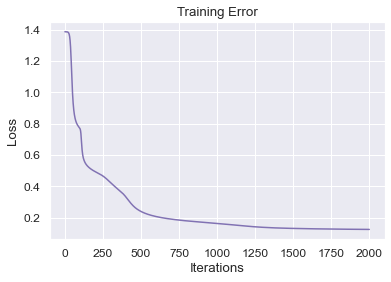

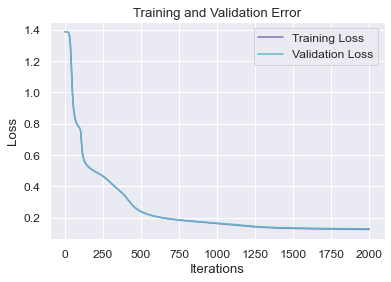

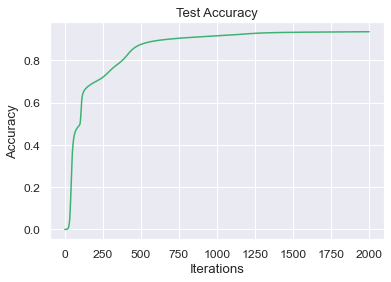


Model Performance

R2 Score : 0.9353674023003941
Model Accuracy: 93.5367402300394%



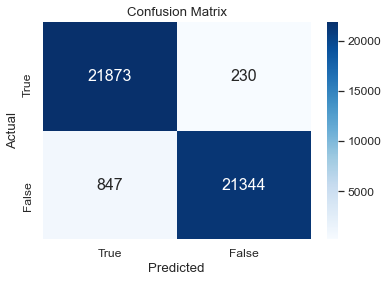

In [44]:
#--- 1 HIDDEN LAYER ---#

# split into training, validation and test data
x = df[["wrist", "gyro_x", "gyro_y", "gyro_z", "acceleration_x", "acceleration_y", "acceleration_z"]].values
y = df[["activity_0", "activity_1"]].values

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size = 1/3, random_state = 0)
x_valid, x_test, y_valid, y_test = train_test_split(x, y, test_size = 1/2, random_state = 0)

# reshape to correct dimensions
x_train = np.transpose(x_train)
y_train = np.transpose(y_train)
x_valid = np.transpose(x_test)
y_valid = np.transpose(y_test)
x_test = np.transpose(x_test)
y_test = np.transpose(y_test)


# set parameters
num_iterations = 2000
hidden_nodes = 4
learning_rate = 0.5
function = "relu"

# init weight matrices and bias
W1 = np.random.randn(hidden_nodes, x_train.shape[0]) * 0.01
b1 = np.zeros(shape =(hidden_nodes, 1))

W2 = np.random.randn(y_train.shape[0], hidden_nodes) * 0.01
b2 = np.zeros(shape =(y_train.shape[0], 1))

thetas = [W1, W2]
bias = [b1, b2]

print("\nTraining\n")

new_thetas, new_bias = batch_grad_desc_custom(x_train, y_train, x_valid, y_valid, x_test, y_test, thetas, bias, num_iterations, learning_rate, function) 


print("\nModel Performance\n")
activations = forward_prop_custom(x_test, new_thetas, new_bias, function)
y_pred = activations[-1]
score = r2_score(y_test , y_pred)
#score = get_accuracy(y_test, y_pred)
print("R2 Score : {}".format(score))
print("Model Accuracy: {}%\n".format(score * 100))

plot_confusion_matrix(y_test, y_pred)

We obtain a very high accuracy since we train for 2000 iterations in order to ensure a fair comparison with the network architecture with two hidden layers as shown below.

### No. of Hidden Layers = 2, No. of Hidden Neurons per Layer = 4

We next explore the effects of an additional hidden layer by increasing the number of hidden layers to two.

We increase the number of iterations to 2000 due to the increased complexity of the network. We investigate the interaction of the new architecture containing two hidden layers, with the *sigmoid*, *relu* and *tanh* activation functions.

#### Sigmoid


Training

Cost after iteration  0:  1.386324
Cost after iteration  500:  1.386294
Cost after iteration  1000:  1.386294
Cost after iteration  1500:  1.386294


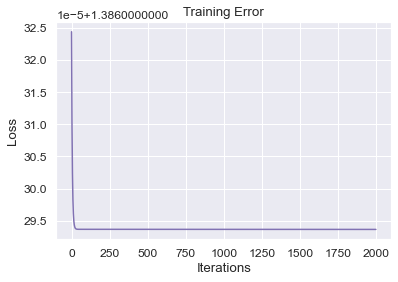

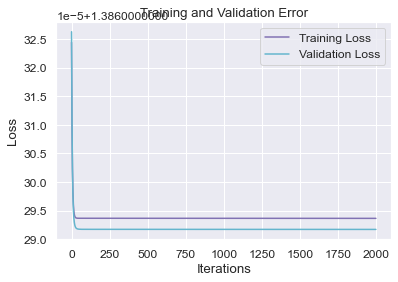

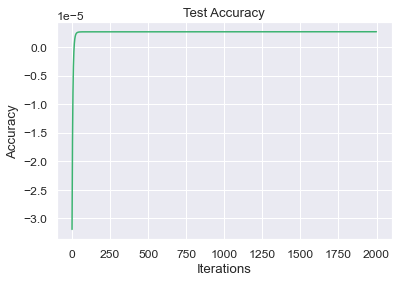


Model Performance

R2 Score : 2.6635928304861137e-06
Model Accuracy: 0.0002663592830486114%



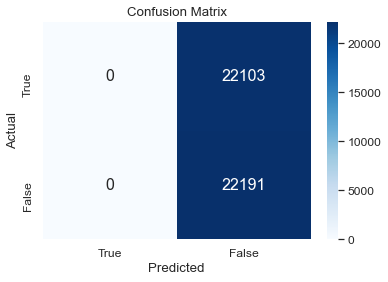

In [45]:
#--- 2 HIDDEN LAYERS + SIGMOID ---#

# split into training, validation and test data
x = df[["wrist", "gyro_x", "gyro_y", "gyro_z", "acceleration_x", "acceleration_y", "acceleration_z"]].values
y = df[["activity_0", "activity_1"]].values

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size = 1/3, random_state = 0)
x_valid, x_test, y_valid, y_test = train_test_split(x, y, test_size = 1/2, random_state = 0)

# reshape to correct dimensions
x_train = np.transpose(x_train)
y_train = np.transpose(y_train)
x_valid = np.transpose(x_test)
y_valid = np.transpose(y_test)
x_test = np.transpose(x_test)
y_test = np.transpose(y_test)


# set parameters
num_iterations = 2000
hidden_nodes = 4
learning_rate = 0.2
function = "sigmoid"

# init weight matrices and bias
W1 = np.random.randn(hidden_nodes, x_train.shape[0]) * 0.01
b1 = np.zeros(shape =(hidden_nodes, 1))

W2 = np.random.randn(hidden_nodes, hidden_nodes) * 0.01
b2 = np.zeros(shape =(hidden_nodes, 1))

W3 = np.random.randn(y_train.shape[0], hidden_nodes) * 0.01
b3 = np.zeros(shape =(y_train.shape[0], 1))

thetas = [W1, W2, W3]
bias = [b1, b2, b3]

print("\nTraining\n")

new_thetas, new_bias = batch_grad_desc_layers(x_train, y_train, x_valid, y_valid, x_test, y_test, thetas, bias, num_iterations, learning_rate, function) 


print("\nModel Performance\n")
activations = forward_prop_layers(x_test, new_thetas, new_bias, function)
y_pred = activations[-1]
score = r2_score(y_test , y_pred)
#score = get_accuracy(y_test, y_pred)
print("R2 Score : {}".format(score))
print("Model Accuracy: {}%\n".format(score * 100))

plot_confusion_matrix(y_test, y_pred)

We observe that the sigmoid function performs poorly for more than one hidden layer and for our particular dataset, as it does not learn correctly. This indicates the value of the alternative *relu* and *tanh* activation functions, as they perform significantly better for the two hidden layer architecture.

In particular, we utilise the *relu* activation function below together with the additional hidden layer. The *relu* function is known to be able to overcome the problem of vanishing gradients and is therefore more suitable for deeper networks. For our case, the *relu* activation function produces much better results for the network with two hidden layers.

#### ReLU


Training

Cost after iteration  0:  1.386294
Cost after iteration  500:  1.386287
Cost after iteration  1000:  1.385965
Cost after iteration  1500:  0.278889


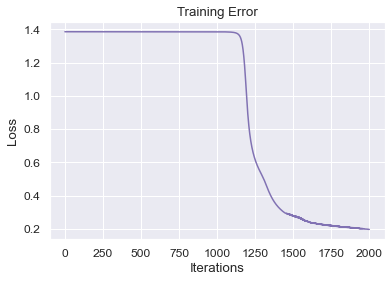

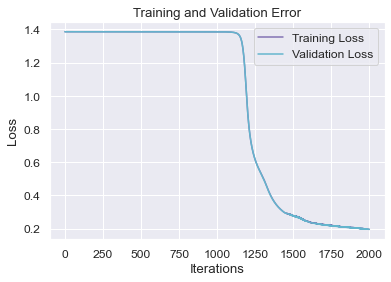

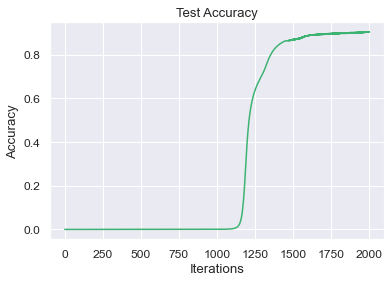


Model Performance

R2 Score : 0.9031006605677245
Model Accuracy: 90.31006605677246%



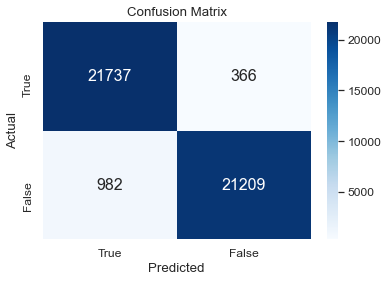

In [46]:
#--- 2 HIDDEN LAYERS + RELU ---#

# split into training, validation and test data
x = df[["wrist", "gyro_x", "gyro_y", "gyro_z", "acceleration_x", "acceleration_y", "acceleration_z"]].values
y = df[["activity_0", "activity_1"]].values

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size = 1/3, random_state = 0)
x_valid, x_test, y_valid, y_test = train_test_split(x, y, test_size = 1/2, random_state = 0)

# reshape to correct dimensions
x_train = np.transpose(x_train)
y_train = np.transpose(y_train)
x_valid = np.transpose(x_test)
y_valid = np.transpose(y_test)
x_test = np.transpose(x_test)
y_test = np.transpose(y_test)


# set parameters
num_iterations = 2000
hidden_nodes = 4
learning_rate = 0.2
function = "relu"

# init weight matrices and bias
W1 = np.random.randn(hidden_nodes, x_train.shape[0]) * 0.01
b1 = np.zeros(shape =(hidden_nodes, 1))

W2 = np.random.randn(hidden_nodes, hidden_nodes) * 0.01
b2 = np.zeros(shape =(hidden_nodes, 1))

W3 = np.random.randn(y_train.shape[0], hidden_nodes) * 0.01
b3 = np.zeros(shape =(y_train.shape[0], 1))

thetas = [W1, W2, W3]
bias = [b1, b2, b3]

print("\nTraining\n")

new_thetas, new_bias = batch_grad_desc_layers(x_train, y_train, x_valid, y_valid, x_test, y_test, thetas, bias, num_iterations, learning_rate, function) 


print("\nModel Performance\n")
activations = forward_prop_layers(x_test, new_thetas, new_bias, function)
y_pred = activations[-1]
score = r2_score(y_test , y_pred)
#score = get_accuracy(y_test, y_pred)
print("R2 Score : {}".format(score))
print("Model Accuracy: {}%\n".format(score * 100))

plot_confusion_matrix(y_test, y_pred)

We observe that the network with two hidden layers takes longer to train due to increased complexity, and that the *relu* activation function allows the network to train correctly, unlike the *sigmoid* function.

Lastly, we investigate the network with two hidden layers together with the *tanh* activation function.

#### Tanh


Training

Cost after iteration  0:  1.386294
Cost after iteration  500:  1.386285
Cost after iteration  1000:  1.304046
Cost after iteration  1500:  0.180735


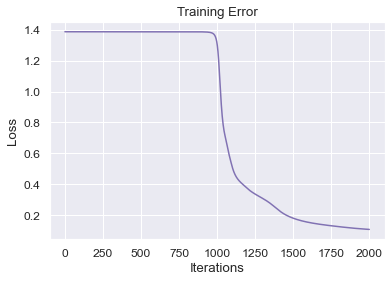

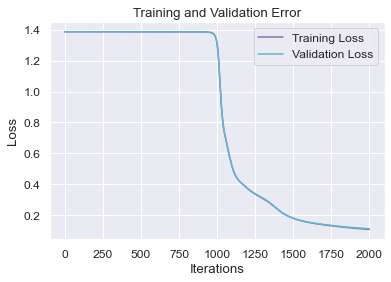

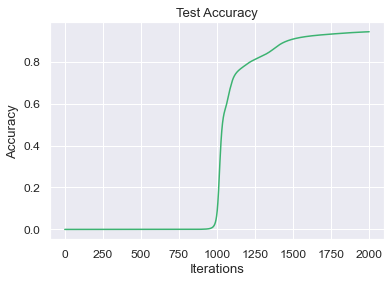


Model Performance

R2 Score : 0.9426485216208744
Model Accuracy: 94.26485216208744%



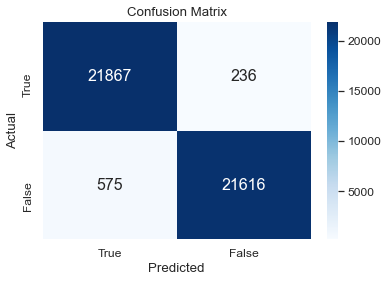

In [48]:
#--- 2 HIDDEN LAYERS + TANH ---#

# split into training, validation and test data
x = df[["wrist", "gyro_x", "gyro_y", "gyro_z", "acceleration_x", "acceleration_y", "acceleration_z"]].values
y = df[["activity_0", "activity_1"]].values

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size = 1/3, random_state = 0)
x_valid, x_test, y_valid, y_test = train_test_split(x, y, test_size = 1/2, random_state = 0)

# reshape to correct dimensions
x_train = np.transpose(x_train)
y_train = np.transpose(y_train)
x_valid = np.transpose(x_test)
y_valid = np.transpose(y_test)
x_test = np.transpose(x_test)
y_test = np.transpose(y_test)


# set parameters
num_iterations = 2000
hidden_nodes = 4
learning_rate = 0.2
function = "tanh"

# init weight matrices and bias
W1 = np.random.randn(hidden_nodes, x_train.shape[0]) * 0.01
b1 = np.zeros(shape =(hidden_nodes, 1))

W2 = np.random.randn(hidden_nodes, hidden_nodes) * 0.01
b2 = np.zeros(shape =(hidden_nodes, 1))

W3 = np.random.randn(y_train.shape[0], hidden_nodes) * 0.01
b3 = np.zeros(shape =(y_train.shape[0], 1))

thetas = [W1, W2, W3]
bias = [b1, b2, b3]

print("\nTraining\n")

new_thetas, new_bias = batch_grad_desc_layers(x_train, y_train, x_valid, y_valid, x_test, y_test, thetas, bias, num_iterations, learning_rate, function) 


print("\nModel Performance\n")
activations = forward_prop_layers(x_test, new_thetas, new_bias, function)
y_pred = activations[-1]
score = r2_score(y_test , y_pred)
#score = get_accuracy(y_test, y_pred)
print("R2 Score : {}".format(score))
print("Model Accuracy: {}%\n".format(score * 100))

plot_confusion_matrix(y_test, y_pred)

We observe that increasing the number of hidden layers results in a great improvement in model performance and generalizability, especially in the case of the *tanh* activation function which achieved **82%** for the single hidden layer network but achives **94%** for the network with two hidden layers (for the current runtime).

However, in order to harness the increased model complexity, the network must be allowed to train for more iterations and a smaller learning rate is necessary to ensure smoothness of the training curve. Therefore the networks were trained for 2000 iterations with a learning rate of 0.2.

We also note a larger difference in performance between the activation functions when the number of hidden layers is increased. The sigmoid activation function performs poorly, indicating the value of the alternative tanh and relu activation functions.

### b) Varying the number of hidden neurons in each layer

To further explore the effects of different network architectures, the number of hidden layers is kept constant at 1 hidden layer and the number of hidden neurons is varied from 2 to 8 in steps of two. For example, the network with 1 hidden layer and 6 hidden neurons is depicted below. 

We use the base sigmoid activation function to ensure fair comparison.

<img src="./hidden_neurons.png" alt="layers" style="width: 400px;"/>

#### No. of Hidden Layers = 1, No. of Hidden Neurons per Layer = 2, Iterations = 1000


Training

Cost after iteration  0:  1.386303
Cost after iteration  500:  0.588086


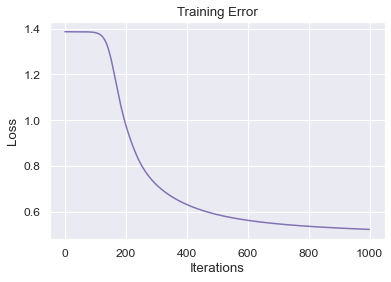

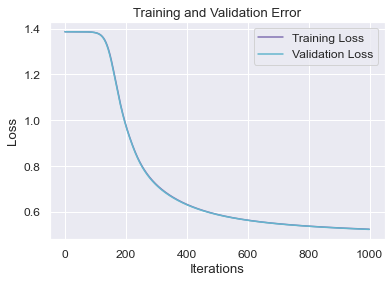

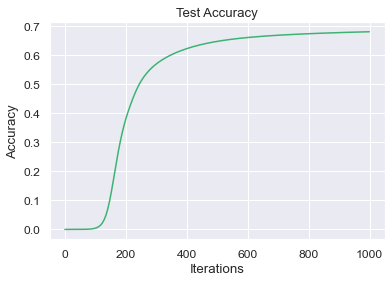


Model Performance

R2 Score : 0.6811329509994672
Model Accuracy: 68.11329509994673%



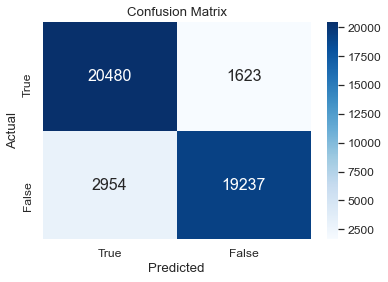

In [49]:
#--- 2 HIDDEN NEURONS ---#

# split into training, validation and test data
x = df[["wrist", "gyro_x", "gyro_y", "gyro_z", "acceleration_x", "acceleration_y", "acceleration_z"]].values
y = df[["activity_0", "activity_1"]].values

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size = 1/3, random_state = 0)
x_valid, x_test, y_valid, y_test = train_test_split(x, y, test_size = 1/2, random_state = 0)

# reshape to correct dimensions
x_train = np.transpose(x_train)
y_train = np.transpose(y_train)
x_valid = np.transpose(x_test)
y_valid = np.transpose(y_test)
x_test = np.transpose(x_test)
y_test = np.transpose(y_test)


# set parameters
num_iterations = 1000
hidden_nodes = 2
learning_rate = 0.5
function = "sigmoid"

# init weight matrices and bias
W1 = np.random.randn(hidden_nodes, x_train.shape[0]) * 0.01
b1 = np.zeros(shape =(hidden_nodes, 1))

W2 = np.random.randn(y_train.shape[0], hidden_nodes) * 0.01
b2 = np.zeros(shape =(y_train.shape[0], 1))

thetas = [W1, W2]
bias = [b1, b2]

print("\nTraining\n")

new_thetas, new_bias = batch_grad_desc_custom(x_train, y_train, x_valid, y_valid, x_test, y_test, thetas, bias, num_iterations, learning_rate, function) 


print("\nModel Performance\n")
a2, y_pred = forward_prop_custom(x_test, new_thetas, new_bias, function)
score = r2_score(y_test , y_pred)
#score = get_accuracy(y_test, y_pred)
print("R2 Score : {}".format(score))
print("Model Accuracy: {}%\n".format(score * 100))

plot_confusion_matrix(y_test, y_pred)

As expected, we observe that a lower number of hidden neurons results in poorer performance, as only **68%** test accuracy is achieved using two hidden neurons.

#### No. of Hidden Layers = 1, No. of Hidden Neurons per Layer = 4, Iterations = 1000


Training

Cost after iteration  0:  1.386289
Cost after iteration  500:  0.509838


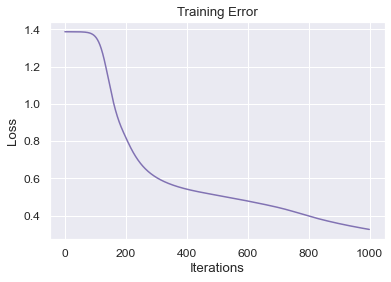

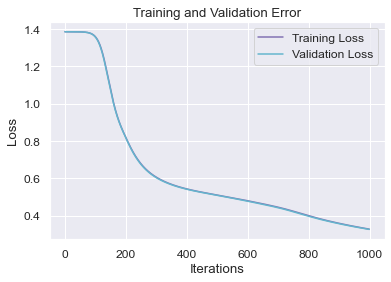

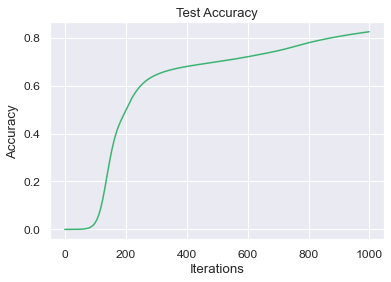


Model Performance

R2 Score : 0.8248705908496874
Model Accuracy: 82.48705908496873%



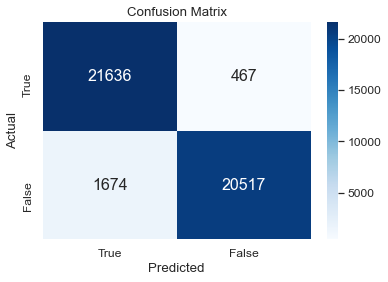

In [50]:
#--- 4 HIDDEN NEURONS ---#

# split into training, validation and test data
x = df[["wrist", "gyro_x", "gyro_y", "gyro_z", "acceleration_x", "acceleration_y", "acceleration_z"]].values
y = df[["activity_0", "activity_1"]].values

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size = 1/3, random_state = 0)
x_valid, x_test, y_valid, y_test = train_test_split(x, y, test_size = 1/2, random_state = 0)

# reshape to correct dimensions
x_train = np.transpose(x_train)
y_train = np.transpose(y_train)
x_valid = np.transpose(x_test)
y_valid = np.transpose(y_test)
x_test = np.transpose(x_test)
y_test = np.transpose(y_test)


# set parameters
num_iterations = 1000
hidden_nodes = 4
learning_rate = 0.5
function = "sigmoid"

# init weight matrices and bias
W1 = np.random.randn(hidden_nodes, x_train.shape[0]) * 0.01
b1 = np.zeros(shape =(hidden_nodes, 1))

W2 = np.random.randn(y_train.shape[0], hidden_nodes) * 0.01
b2 = np.zeros(shape =(y_train.shape[0], 1))

thetas = [W1, W2]
bias = [b1, b2]

print("\nTraining\n")

new_thetas, new_bias = batch_grad_desc_custom(x_train, y_train, x_valid, y_valid, x_test, y_test, thetas, bias, num_iterations, learning_rate, function) 


print("\nModel Performance\n")
a2, y_pred = forward_prop_custom(x_test, new_thetas, new_bias, function)
score = r2_score(y_test , y_pred)
#score = get_accuracy(y_test, y_pred)
print("R2 Score : {}".format(score))
print("Model Accuracy: {}%\n".format(score * 100))

plot_confusion_matrix(y_test, y_pred)

As we increase the number of hidden neurons to four, we achieve a substantial increase in accuracy to **82%**.

#### No. of Hidden Layers = 1, No. of Hidden Neurons per Layer = 6, Iterations = 1000


Training

Cost after iteration  0:  1.386302
Cost after iteration  500:  0.487350


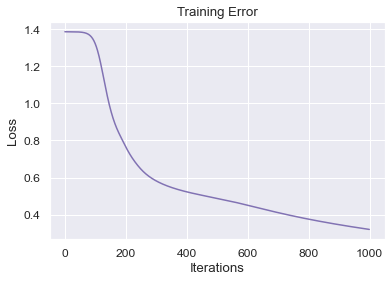

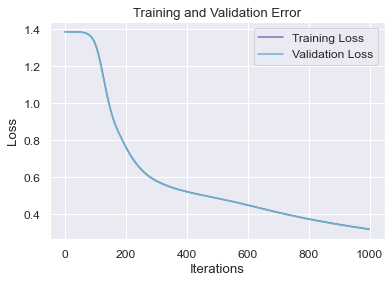

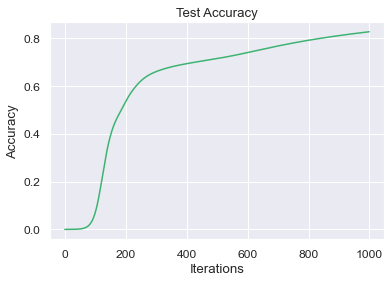


Model Performance

R2 Score : 0.8259364660125266
Model Accuracy: 82.59364660125266%



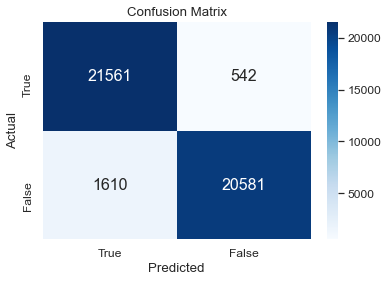

In [51]:
#--- 6 HIDDEN NEURONS ---#

# split into training, validation and test data
x = df[["wrist", "gyro_x", "gyro_y", "gyro_z", "acceleration_x", "acceleration_y", "acceleration_z"]].values
y = df[["activity_0", "activity_1"]].values

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size = 1/3, random_state = 0)
x_valid, x_test, y_valid, y_test = train_test_split(x, y, test_size = 1/2, random_state = 0)

# reshape to correct dimensions
x_train = np.transpose(x_train)
y_train = np.transpose(y_train)
x_valid = np.transpose(x_test)
y_valid = np.transpose(y_test)
x_test = np.transpose(x_test)
y_test = np.transpose(y_test)


# set parameters
num_iterations = 1000
hidden_nodes = 6
learning_rate = 0.5
function = "sigmoid"

# init weight matrices and bias
W1 = np.random.randn(hidden_nodes, x_train.shape[0]) * 0.01
b1 = np.zeros(shape =(hidden_nodes, 1))

W2 = np.random.randn(y_train.shape[0], hidden_nodes) * 0.01
b2 = np.zeros(shape =(y_train.shape[0], 1))

thetas = [W1, W2]
bias = [b1, b2]

print("\nTraining\n")

new_thetas, new_bias = batch_grad_desc_custom(x_train, y_train, x_valid, y_valid, x_test, y_test, thetas, bias, num_iterations, learning_rate, function) 


print("\nModel Performance\n")
a2, y_pred = forward_prop_custom(x_test, new_thetas, new_bias, function)
score = r2_score(y_test , y_pred)
#score = get_accuracy(y_test, y_pred)
print("R2 Score : {}".format(score))
print("Model Accuracy: {}%\n".format(score * 100))

plot_confusion_matrix(y_test, y_pred)

A further increase in accuracy is observed for six hidden layer neurons.

#### No. of Hidden Layers = 1, No. of Hidden Neurons per Layer = 8, Iterations = 1000


Training

Cost after iteration  0:  1.386339
Cost after iteration  500:  0.473936


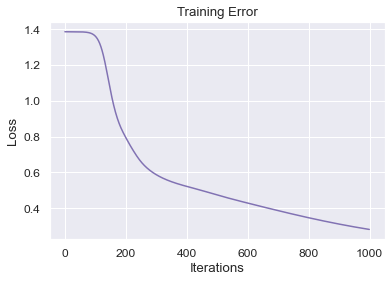

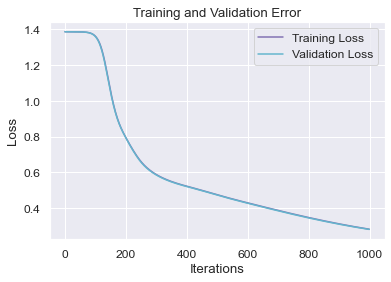

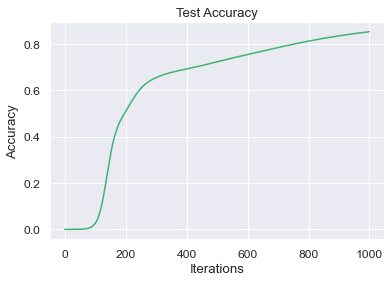


Model Performance

R2 Score : 0.8533564845950783
Model Accuracy: 85.33564845950782%



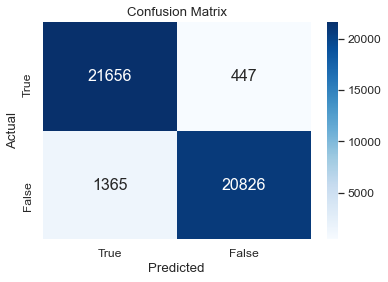

In [52]:
#--- 8 HIDDEN NEURONS ---#

# split into training, validation and test data
x = df[["wrist", "gyro_x", "gyro_y", "gyro_z", "acceleration_x", "acceleration_y", "acceleration_z"]].values
y = df[["activity_0", "activity_1"]].values

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size = 1/3, random_state = 0)
x_valid, x_test, y_valid, y_test = train_test_split(x, y, test_size = 1/2, random_state = 0)

# reshape to correct dimensions
x_train = np.transpose(x_train)
y_train = np.transpose(y_train)
x_valid = np.transpose(x_test)
y_valid = np.transpose(y_test)
x_test = np.transpose(x_test)
y_test = np.transpose(y_test)


# set parameters
num_iterations = 1000
hidden_nodes = 8
learning_rate = 0.5
function = "sigmoid"

# init weight matrices and bias
W1 = np.random.randn(hidden_nodes, x_train.shape[0]) * 0.01
b1 = np.zeros(shape =(hidden_nodes, 1))

W2 = np.random.randn(y_train.shape[0], hidden_nodes) * 0.01
b2 = np.zeros(shape =(y_train.shape[0], 1))

thetas = [W1, W2]
bias = [b1, b2]

print("\nTraining\n")

new_thetas, new_bias = batch_grad_desc_custom(x_train, y_train, x_valid, y_valid, x_test, y_test, thetas, bias, num_iterations, learning_rate, function) 


print("\nModel Performance\n")
a2, y_pred = forward_prop_custom(x_test, new_thetas, new_bias, function)
score = r2_score(y_test , y_pred)
#score = get_accuracy(y_test, y_pred)
print("R2 Score : {}".format(score))
print("Model Accuracy: {}%\n".format(score * 100))

plot_confusion_matrix(y_test, y_pred)

It can be noted that an increased number of hidden neurons improves test accuracy since the model complexity is increased. As the number of hidden neurons increases from 2 to 4 to 6 to 8, an improvement in test accuracy is realised and therefore generalisability is improved. It should be noted that this improvement is only realised if the network trains for a sufficiently long number of iterations.

### 4. Additional Investigation: Effects of the Learning Rate

During the investigation, it was noted that learning rate plays a very important role when training each of the network architectures considered. Here we depict the effects of a learning rate that is too large or too small.

#### Large Learning Rate


Training

Cost after iteration  0:  1.386301
Cost after iteration  500:  0.381672


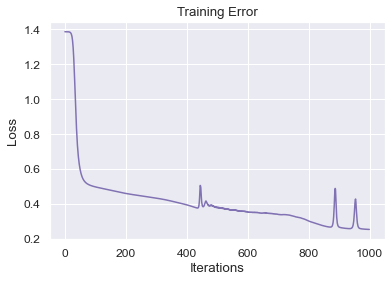

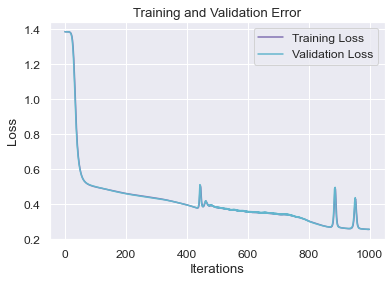

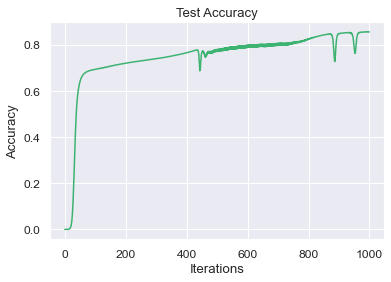


Model Performance

R2 Score : 0.8543967529643084
Model Accuracy: 85.43967529643083%



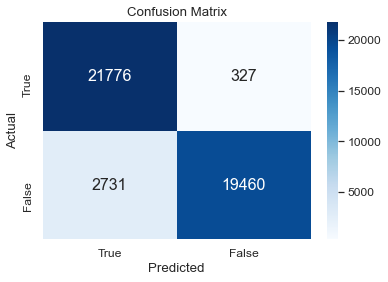

In [53]:
#--- LEARNING RATE = 0.8 ---#

# split into training, validation and test data
x = df[["wrist", "gyro_x", "gyro_y", "gyro_z", "acceleration_x", "acceleration_y", "acceleration_z"]].values
y = df[["activity_0", "activity_1"]].values

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size = 1/3, random_state = 0)
x_valid, x_test, y_valid, y_test = train_test_split(x, y, test_size = 1/2, random_state = 0)

# reshape to correct dimensions
x_train = np.transpose(x_train)
y_train = np.transpose(y_train)
x_valid = np.transpose(x_test)
y_valid = np.transpose(y_test)
x_test = np.transpose(x_test)
y_test = np.transpose(y_test)


# set parameters
num_iterations = 1000
hidden_nodes = 4
learning_rate = 0.8
function = "relu"

# init weight matrices and bias
W1 = np.random.randn(hidden_nodes, x_train.shape[0]) * 0.01
b1 = np.zeros(shape =(hidden_nodes, 1))

W2 = np.random.randn(y_train.shape[0], hidden_nodes) * 0.01
b2 = np.zeros(shape =(y_train.shape[0], 1))

thetas = [W1, W2]
bias = [b1, b2]

print("\nTraining\n")

new_thetas, new_bias = batch_grad_desc_custom(x_train, y_train, x_valid, y_valid, x_test, y_test, thetas, bias, num_iterations, learning_rate, function) 


print("\nModel Performance\n")
a2, y_pred = forward_prop_custom(x_test, new_thetas, new_bias, function)
score = r2_score(y_test , y_pred)
#score = get_accuracy(y_test, y_pred)
print("R2 Score : {}".format(score))
print("Model Accuracy: {}%\n".format(score * 100))

plot_confusion_matrix(y_test, y_pred)

We observe that if the learning rate is too high, the training curve is not smooth as the updates are too large.

#### Small Learning Rate


Training

Cost after iteration  0:  1.386267
Cost after iteration  500:  0.951754


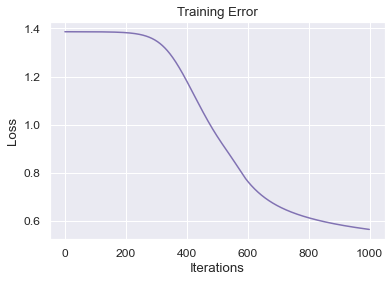

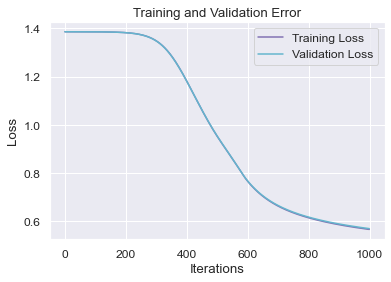

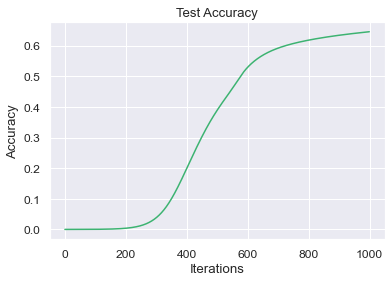


Model Performance

R2 Score : 0.6452312750585538
Model Accuracy: 64.52312750585538%



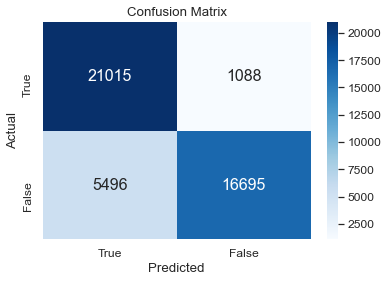

In [54]:
#--- LEARNING RATE = 0.05 ---#

# split into training, validation and test data
x = df[["wrist", "gyro_x", "gyro_y", "gyro_z", "acceleration_x", "acceleration_y", "acceleration_z"]].values
y = df[["activity_0", "activity_1"]].values

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size = 1/3, random_state = 0)
x_valid, x_test, y_valid, y_test = train_test_split(x, y, test_size = 1/2, random_state = 0)

# reshape to correct dimensions
x_train = np.transpose(x_train)
y_train = np.transpose(y_train)
x_valid = np.transpose(x_test)
y_valid = np.transpose(y_test)
x_test = np.transpose(x_test)
y_test = np.transpose(y_test)


# set parameters
num_iterations = 1000
hidden_nodes = 4
learning_rate = 0.05
function = "relu"

# init weight matrices and bias
W1 = np.random.randn(hidden_nodes, x_train.shape[0]) * 0.01
b1 = np.zeros(shape =(hidden_nodes, 1))

W2 = np.random.randn(y_train.shape[0], hidden_nodes) * 0.01
b2 = np.zeros(shape =(y_train.shape[0], 1))

thetas = [W1, W2]
bias = [b1, b2]

print("\nTraining\n")

new_thetas, new_bias = batch_grad_desc_custom(x_train, y_train, x_valid, y_valid, x_test, y_test, thetas, bias, num_iterations, learning_rate, function) 


print("\nModel Performance\n")
a2, y_pred = forward_prop_custom(x_test, new_thetas, new_bias, function)
score = r2_score(y_test , y_pred)
#score = get_accuracy(y_test, y_pred)
print("R2 Score : {}".format(score))
print("Model Accuracy: {}%\n".format(score * 100))

plot_confusion_matrix(y_test, y_pred)

We observe that a learning rate that is too small causes the updates to be too small and therefore poorer performance is obtained at only **65%** accuracy.

### 5. Best Combination of Parameters

We combine our learnings from each experiment in order to build the optimal network architecture.


Training

Cost after iteration  0:  1.386293
Cost after iteration  500:  1.386231
Cost after iteration  1000:  0.325937
Cost after iteration  1500:  0.103253


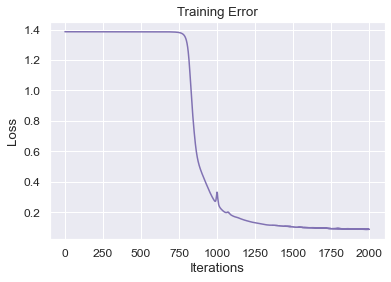

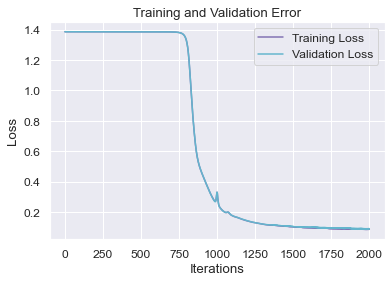

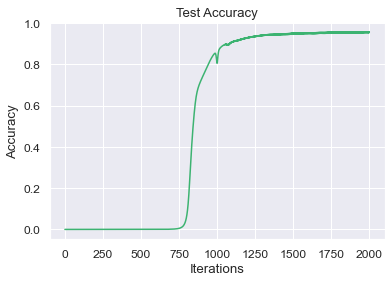


Model Performance

R2 Score : 0.9527877036894957
Model Accuracy: 95.27877036894957%



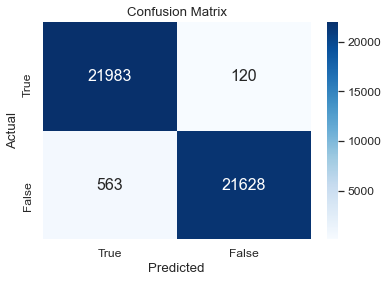

In [57]:
#--- BEST NETWORK PARAMETER CHOICE ---#

# split into training, validation and test data
x = df[["wrist", "gyro_x", "gyro_y", "gyro_z", "acceleration_x", "acceleration_y", "acceleration_z"]].values
y = df[["activity_0", "activity_1"]].values

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size = 1/3, random_state = 0)
x_valid, x_test, y_valid, y_test = train_test_split(x, y, test_size = 1/2, random_state = 0)

# reshape to correct dimensions
x_train = np.transpose(x_train)
y_train = np.transpose(y_train)
x_valid = np.transpose(x_test)
y_valid = np.transpose(y_test)
x_test = np.transpose(x_test)
y_test = np.transpose(y_test)


# set parameters
num_iterations = 2000
hidden_nodes = 8
learning_rate = 0.2 # 0.5
function = "relu"

# init weight matrices and bias
W1 = np.random.randn(hidden_nodes, x_train.shape[0]) * 0.01
b1 = np.zeros(shape =(hidden_nodes, 1))

W2 = np.random.randn(hidden_nodes, hidden_nodes) * 0.01
b2 = np.zeros(shape =(hidden_nodes, 1))

W3 = np.random.randn(y_train.shape[0], hidden_nodes) * 0.01
b3 = np.zeros(shape =(y_train.shape[0], 1))

thetas = [W1, W2, W3]
bias = [b1, b2, b3]

print("\nTraining\n")

new_thetas, new_bias = batch_grad_desc_layers(x_train, y_train, x_valid, y_valid, x_test, y_test, thetas, bias, num_iterations, learning_rate, function) 


print("\nModel Performance\n")
predictions = forward_prop_layers(x_test, new_thetas, new_bias, function)
y_pred = predictions[-1]
score = r2_score(y_test , y_pred)
#score = get_accuracy(y_test, y_pred)
print("R2 Score : {}".format(score))
print("Model Accuracy: {}%\n".format(score * 100))

plot_confusion_matrix(y_test, y_pred)

Therefore by combining an increased number of hidden layers and an increased number of hidden neurons, together with the *relu* activation function, we achieve the highest test accuracy of **95%** (obtained during this runtime).